# Appendix

In [757]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import pearsonr
import seaborn as sns

# Import Data

## Reviews

In [5]:
# London reviews March 2019

reviews = pd.read_csv('reviews_march.csv')

In [6]:
reviews.sample(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
259831,3664786,313517014,2018-08-25,24759553,Torben Nordal,Really great apartment very central in Mayfair...
280186,4123560,27715038,2015-03-10,25802017,Melvin,"Exactly as described - great location, tucked ..."
340321,5278769,366755899,2019-01-03,69107848,Roberta,"If you are traveling to London, Alison’s place..."
1056528,22367089,229763841,2018-01-25,163837463,Elena,"Nos ha encantado este piso, muy cerca de la es..."
332323,5115270,28313249,2015-03-22,24191725,Peter,We spent four amazing days at Sharad's Apartme...


In [7]:
# How many reviews?
len(reviews)

1249466

In [16]:
# generate a column denoting the reviews year
reviews['year'] = [int(x.split('-')[0]) for x in reviews['date']]

In [9]:
reviews_grouped = reviews.groupby('listing_id').count()

In [10]:
# How many listings in the review data
len(reviews_grouped)

59270

In [18]:
# get most recent review date for each listing

listing_1st_date = {}
for listing in reviews_grouped.index:
    year = reviews[reviews['listing_id']==listing]
    earliest_year = max(year['year'])
    listing_1st_date.update({listing: earliest_year})

In [19]:
import operator
listings_1st_date_sorted = sorted(listing_1st_date.items(), key=operator.itemgetter(1))

In [23]:
listing_greater_2018 = {k: v for k, v in listing_1st_date.items() if v >= 2018}

In [25]:
listing_greater_2019 = {k: v for k, v in listing_1st_date.items() if v >= 2019}

In [29]:
# How many listings with reviews in 2018 or earlier?

print('2018 or earlier:',len(listing_greater_2018),'\n2019 or earlier:',len(listing_greater_2019))

2018 or earlier: 48752 
2019 or earlier: 26890


In [34]:
# find number of listings with reviews not in 2018 or 2019

inactive = []
for i in listings_1st_date_sorted:
    if i[1] == 2019 or i[1] == 2018:
        None
    else:
        inactive.append(i)


In [35]:
# 10518 do not have reviews in 2018 or 2019
len(inactive)

10518

In [53]:
# generate listing and number of reviews for properties before 2018
number_reviews_inactive = {}
for c,listing in enumerate(inactive):
    number_reviews_inactive.update({listing:reviews_grouped.loc[inactive[c][0]].id})

In [713]:
len(number_reviews_inactive)

10518

## Listings

In [718]:
# These statistics come from UK National Statistics ONS

borough_population = {'Barking and Dagenham': 210711,
'Barnet':387803,
'Bexley':246124,
'Brent':329102,
'Bromley':329391,
'Camden':253361,
'City of London':7654,
'Westminster':244796,
'Croydon':384837,
'Ealing':342736,
'Enfield':332705,
'Greenwich':282849,
'Hackney':275929,
'Hammersmith and Fulham':182998,
'Haringey':271224,
'Harrow':248880,
'Havering':256039,
'Hillingdon':302343,
'Hounslow':269100,
'Islington':235000,
'Kensington and Chelsea':155741,
'Kingston upon Thames':174609,
'Lambeth':324048,
'Lewisham':301307,
'Merton':206052,
'Newham':347996,
'Redbridge':301785,
'Richmond upon Thames':195680,
'Southwark':314232,
'Sutton':203243,
'Tower Hamlets':307964,
'Waltham Forest':275505,
'Wandsworth':323257}

In [720]:
population_df = pd.DataFrame.from_dict(borough_population,orient = 'index')

In [722]:
population_df.columns = ['population']
population_df.head()

,population
Barking and Dagenham,210711
Barnet,387803
Bexley,246124
Brent,329102
Bromley,329391


In [723]:
population_df.sum()

population    8825001
dtype: int64

In [55]:
# London listings March 2019
listings = pd.read_csv('listings_march.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [68]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20190307140352,2019-03-08,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,...,f,f,moderate,f,f,3,1,2,0,0.13
1,15400,https://www.airbnb.com/rooms/15400,20190307140352,2019-03-08,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.72
2,17402,https://www.airbnb.com/rooms/17402,20190307140352,2019-03-08,Superb 3-Bed/2 Bath & Wifi: Trendy W1,"Open from June 2018 after a 3-year break, we a...",Ready again from June 2018 for bookings after ...,"Open from June 2018 after a 3-year break, we a...",none,"Location, location, location! You won't find b...",...,f,f,strict_14_with_grace_period,f,f,13,13,0,0,0.40
3,24328,https://www.airbnb.com/rooms/24328,20190307140352,2019-03-08,Battersea 2 bedroom house & parking,"Artist house, high ceiling bedrooms, private p...",- End of terrace two bedroom house close to So...,"Artist house, high ceiling bedrooms, private p...",family,"- Battersea is a quiet family area, easy acces...",...,f,f,moderate,t,t,1,1,0,0,0.91
4,25023,https://www.airbnb.com/rooms/25023,20190307140352,2019-03-08,All-comforts 2-bed flat near Wimbledon tennis,"Large, all comforts, 2-bed flat; first floor; ...",10 mins walk to Southfields tube and Wimbledon...,"Large, all comforts, 2-bed flat; first floor; ...",none,This is a leafy residential area with excellen...,...,f,f,moderate,f,f,1,1,0,0,0.71


In [56]:
print(len(listings),len(listings[listings['number_of_reviews'] != 0]))

79129 59270


In [712]:
79129 -59270

19859

In [28]:
listings['neighbourhood_cleansed'].unique()

array(['Islington', 'Kensington and Chelsea', 'Westminster', 'Wandsworth',
       'Barnet', 'Hounslow', 'Camden', 'Richmond upon Thames', 'Haringey',
       'Hackney', 'Southwark', 'Croydon', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Waltham Forest', 'Brent', 'Lambeth',
       'Ealing', 'Newham', 'Merton', 'Lewisham', 'Bromley', 'Havering',
       'Enfield', 'City of London', 'Barking and Dagenham', 'Greenwich',
       'Hillingdon', 'Harrow', 'Redbridge', 'Bexley',
       'Kingston upon Thames', 'Sutton'], dtype=object)

In [57]:
# Does the reviews file have all the reviews?? e.g. len reviews = sum(no. reviews per listing)

listings_reviews = listings['number_of_reviews'].sum()
print(listings_reviews,len(reviews))

1249466 1249466


# Check London Boroughs are correct

In [226]:
# List of London boroughs from wikipedia
London_boroughs = ['City of London (not a London borough)',
'City of Westminster',
'Kensington and Chelsea',
'Hammersmith and Fulham',
'Wandsworth',
'Lambeth',
'Southwark',
'Tower Hamlets',
'Hackney',
'Islington',
'Camden',
'Brent',
'Ealing',
'Hounslow',
'Richmond upon Thames',
'Kingston upon Thames',
'Merton',
'Sutton',
'Croydon',
'Bromley',
'Lewisham',
'Greenwich',
'Bexley',
'Havering',
'Barking and Dagenham',
'Redbridge',
'Newham',
'Waltham Forest',
'Haringey',
'Enfield',
'Barnet',
'Harrow',
'Hillingdon']

In [231]:
# check if borough in data are actual boroughs in london
count = 0
for borough in x.index:
    if borough in London_boroughs:
        count +=1
    else:
        print(borough)

City of London
Westminster


In [230]:
# All boroughs of london are in my data

31

# Network Creation

In [ ]:
# Goal dataframe: 'reviewer id' 'listing id' 'neighbourhood'
reviews_id_df = reviews[['listing_id', 'reviewer_id']]

In [ ]:
listings_neighbourhood = listings[['id','neighbourhood_cleansed']]

In [715]:
listings_neighbourhood.head()

,id,neighbourhood_cleansed
0,13913,Islington
1,15400,Kensington and Chelsea
2,17402,Westminster
3,24328,Wandsworth
4,25023,Wandsworth


In [ ]:
network_df = reviews_id_df.merge(listings_neighbourhood, right_on = 'id', left_on = 'listing_id')

In [716]:
network_df.head()

,listing_id,reviewer_id,id,neighbourhood_cleansed
0,13913,177109,13913,Islington
1,13913,19835707,13913,Islington
2,13913,1110304,13913,Islington
3,13913,1216358,13913,Islington
4,13913,490840,13913,Islington


In [ ]:
B = nx.Graph()
B.add_nodes_from(network_df['listing_id'], bipartite=0)
B.add_nodes_from(network_df['reviewer_id'], bipartite=1)
B.add_edges_from(
    [(row['reviewer_id'], row['listing_id']) for idx, row in test.iterrows()])

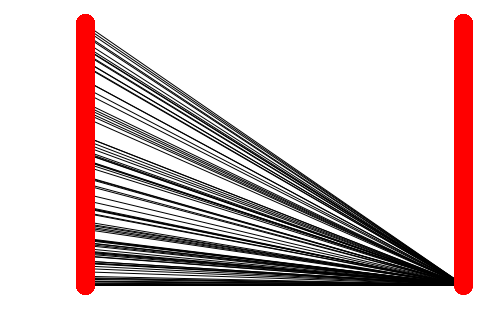

In [717]:
pos = {node:[0, i] for i,node in enumerate(network_df['reviewer_id'])}
pos.update({node:[1, i] for i,node in enumerate(network_df['listing_id'])})
nx.draw(B, pos, with_labels=False)
# for p in pos:  # raise text positions
#     pos[p][1] += 0.25
# nx.draw_networkx_labels(B, pos)

plt.show()

# Analysis

## Listing Nodes

In [383]:
# dataframe denoting number of reviews as 0
zero = listings[listings['number_of_reviews']==0].groupby('neighbourhood_cleansed').count()

# 
zero['id'] / listings.groupby("neighbourhood_cleansed").count()['id']


neighbourhood_cleansed
Barking and Dagenham      0.395833
Barnet                    0.323410
Bexley                    0.400000
Brent                     0.258442
Bromley                   0.321543
Camden                    0.222484
City of London            0.297872
Croydon                   0.310010
Ealing                    0.259002
Enfield                   0.337370
Greenwich                 0.262750
Hackney                   0.231575
Hammersmith and Fulham    0.234908
Haringey                  0.262432
Harrow                    0.301802
Havering                  0.362791
Hillingdon                0.278986
Hounslow                  0.282922
Islington                 0.231166
Kensington and Chelsea    0.270516
Kingston upon Thames      0.285421
Lambeth                   0.216041
Lewisham                  0.258949
Merton                    0.317054
Newham                    0.284949
Redbridge                 0.334877
Richmond upon Thames      0.272886
Southwark                 0.2089

In [384]:
# How many properties with zero reviews in each borough?

# Overall 
London_zeros = len(listings[listings['number_of_reviews'] == 0]) / len(listings)

# dataframe denoting number of reviews as 0
zero = listings[listings['number_of_reviews']==0].groupby('neighbourhood_cleansed').count()

# 
percentage_zero = zero['id'] / listings.groupby("neighbourhood_cleansed").count()['id']

print(London_zeros,percentage_zero)

0.25096993516915417 neighbourhood_cleansed
Barking and Dagenham      0.395833
Barnet                    0.323410
Bexley                    0.400000
Brent                     0.258442
Bromley                   0.321543
Camden                    0.222484
City of London            0.297872
Croydon                   0.310010
Ealing                    0.259002
Enfield                   0.337370
Greenwich                 0.262750
Hackney                   0.231575
Hammersmith and Fulham    0.234908
Haringey                  0.262432
Harrow                    0.301802
Havering                  0.362791
Hillingdon                0.278986
Hounslow                  0.282922
Islington                 0.231166
Kensington and Chelsea    0.270516
Kingston upon Thames      0.285421
Lambeth                   0.216041
Lewisham                  0.258949
Merton                    0.317054
Newham                    0.284949
Redbridge                 0.334877
Richmond upon Thames      0.272886
Southwark   

In [398]:
# format the calendar_updated column to be a count of days

calendar_days = []
for string in listings['calendar_updated']:
    if string == 'today':
        calendar_days.append(1)
    elif string == 'yesterday':
        calendar_days.append(2)
    elif string == 'never':
        calendar_days.append(100000)
    elif string.split(' ')[1] == 'days':
        calendar_days.append(int(string.split(' ')[0]))
    elif string.split(' ')[1] == 'week':
        calendar_days.append(7)
    elif string.split(' ')[1] == 'weeks':
        calendar_days.append(int(string.split(' ')[0])*7)
    elif string.split(' ')[1] == 'months':
        calendar_days.append(int(string.split(' ')[0])* 30)
        

In [400]:
listings['calendar_days'] = calendar_days

In [401]:
listings['calendar_days'].describe()

count     79129.000000
mean        608.405502
std        6556.189153
min           1.000000
25%           1.000000
50%          21.000000
75%         180.000000
max      100000.000000
Name: calendar_days, dtype: float64

In [406]:
len(listings[listings['calendar_days'] <= 20])

38776

In [407]:
listings[listings['calendar_days'] <= 50].sample(5)[['listing_url','calendar_updated']]

,listing_url,calendar_updated
52417,https://www.airbnb.com/rooms/24571160,today
25367,https://www.airbnb.com/rooms/15073426,today
57142,https://www.airbnb.com/rooms/26376092,today
77568,https://www.airbnb.com/rooms/32536286,2 weeks ago
2901,https://www.airbnb.com/rooms/1534095,3 weeks ago


In [389]:
listings[listings['number_of_reviews']==0].sample(5)[['listing_url','calendar_updated']]

,listing_url,calendar_updated
77263,https://www.airbnb.com/rooms/32481360,today
20194,https://www.airbnb.com/rooms/12826845,32 months ago
14218,https://www.airbnb.com/rooms/9130285,today
14970,https://www.airbnb.com/rooms/9539544,35 months ago
59953,https://www.airbnb.com/rooms/27382586,2 weeks ago


In [660]:
# How many properties with zero reviews in each borough?

# Overall 
London_zeros = len(listings[listings['number_of_reviews'] == 0]) / len(listings)

# dataframe denoting number of reviews as 0
number_zero_reviews = listings[listings['number_of_reviews']==0].groupby('neighbourhood_cleansed').count()['id']

# 
percentage_zero = number_zero_reviews / listings.groupby("neighbourhood_cleansed").count()['id']

print(London_zeros,percentage_zero)

0.25096993516915417 neighbourhood_cleansed
Barking and Dagenham      0.395833
Barnet                    0.323410
Bexley                    0.400000
Brent                     0.258442
Bromley                   0.321543
Camden                    0.222484
City of London            0.297872
Croydon                   0.310010
Ealing                    0.259002
Enfield                   0.337370
Greenwich                 0.262750
Hackney                   0.231575
Hammersmith and Fulham    0.234908
Haringey                  0.262432
Harrow                    0.301802
Havering                  0.362791
Hillingdon                0.278986
Hounslow                  0.282922
Islington                 0.231166
Kensington and Chelsea    0.270516
Kingston upon Thames      0.285421
Lambeth                   0.216041
Lewisham                  0.258949
Merton                    0.317054
Newham                    0.284949
Redbridge                 0.334877
Richmond upon Thames      0.272886
Southwark   

In [640]:
len(percentage_zero)

33

In [567]:
# Get the mean number of reviews by borough
data2 = listings.groupby('neighbourhood_cleansed').mean()['number_of_reviews']

In [568]:
# Calculate the percentage of superhost properties in each borough
percentage_superhost_all = {}
for borough in data2.index:
    df = listings[listings['neighbourhood_cleansed']==borough]
    percentage = df.groupby('host_is_superhost').count().loc['t'][0] / (df.groupby('host_is_superhost').count().loc['t'][0]+df.groupby('host_is_superhost').count().loc['f'][0])
    percentage_superhost_all.update({borough:percentage})

In [569]:
# Calculate the average review score in each borough

score_df_all = listings.groupby('neighbourhood_cleansed').mean()['review_scores_rating']

In [570]:
# Calculate the number of reviews in each borough

number_reviews_df_all = listings.groupby('neighbourhood_cleansed').sum()['number_of_reviews']

In [571]:
# Calculate the number of listings in each borough

number_listings_df_all = listings.groupby('neighbourhood_cleansed').count()['id']

In [572]:
# Calculate the skewness of each borough
skewness_df_all = listings.groupby('neighbourhood_cleansed').skew()['number_of_reviews']
skewness_df_all.columns = ['skewness']
skewness_df_all

neighbourhood_cleansed
Barking and Dagenham      6.376955
Barnet                    7.167501
Bexley                    4.173441
Brent                     3.563310
Bromley                   6.003456
Camden                    5.458471
City of London            4.120453
Croydon                   5.416404
Ealing                    3.876042
Enfield                   4.251259
Greenwich                 4.781951
Hackney                   5.412572
Hammersmith and Fulham    5.132627
Haringey                  5.046294
Harrow                    4.435796
Havering                  3.102594
Hillingdon                5.888254
Hounslow                  5.294320
Islington                 5.199346
Kensington and Chelsea    4.727292
Kingston upon Thames      3.681264
Lambeth                   4.643477
Lewisham                  4.428519
Merton                    4.310671
Newham                    5.394952
Redbridge                 4.277214
Richmond upon Thames      3.815914
Southwark                 3.7683

In [585]:
# Average degree for superhosts

superhost_df = listings[listings['host_is_superhost']=='t']
superhost_df.groupby('neighbourhood_cleansed').mean()['number_of_reviews']

neighbourhood_cleansed
Barking and Dagenham      30.000000
Barnet                    34.148718
Bexley                    25.833333
Brent                     34.182131
Bromley                   26.602151
Camden                    43.360053
City of London            46.000000
Croydon                   27.131034
Ealing                    47.043636
Enfield                   29.137500
Greenwich                 38.454545
Hackney                   40.057292
Hammersmith and Fulham    39.565008
Haringey                  39.991018
Harrow                    41.210526
Havering                  19.975000
Hillingdon                41.831858
Hounslow                  46.928105
Islington                 42.289174
Kensington and Chelsea    31.190413
Kingston upon Thames      36.738636
Lambeth                   47.246452
Lewisham                  32.812298
Merton                    28.288043
Newham                    34.522523
Redbridge                 37.280899
Richmond upon Thames      44.704846
South

In [586]:
# Average degree for non-superhosts

non_superhost_df = listings[listings['host_is_superhost']=='f']
non_superhost_df.groupby('neighbourhood_cleansed').mean()['number_of_reviews']

neighbourhood_cleansed
Barking and Dagenham       3.742308
Barnet                     6.741231
Bexley                     4.213270
Brent                     13.076313
Bromley                    6.412879
Camden                    15.627887
City of London            11.347594
Croydon                    7.503394
Ealing                     9.825688
Enfield                    6.365462
Greenwich                  7.977432
Hackney                    9.574009
Hammersmith and Fulham    13.426859
Haringey                   8.657042
Harrow                     6.578811
Havering                   4.497143
Hillingdon                12.690205
Hounslow                  13.245421
Islington                 12.275163
Kensington and Chelsea    12.523675
Kingston upon Thames       7.245614
Lambeth                   14.553974
Lewisham                   8.717155
Merton                     5.113924
Newham                    11.641337
Redbridge                  7.379249
Richmond upon Thames       9.186957
South

In [748]:
listings_normalized = number_listings_df_all/population_df['population']
listings_normalized = listings_normalized.rename('listings_normalized')

In [749]:
# Start creating the master dataframe
master_df_all = pd.DataFrame.from_dict(percentage_superhost_all,orient = 'index').join(data2)
master_df_all = master_df_all.join(score_df_all)
master_df_all.columns = [['percentage_superhost','average_reviews','average_score']]
master_df_all = master_df_all.join(skewness_df_all)
master_df_all.columns = [['percentage_superhost','average_reviews','average_score','skewness']]
master_df_all = master_df_all.join(number_reviews_df_all)
master_df_all = master_df_all.join(number_listings_df_all)
master_df_all.columns = [['percentage_superhost','average_reviews','average_score','skewness','total_reviews','total_listings']]
master_df_all = master_df_all.join(number_zero_reviews)
master_df_all.columns = [['percentage_superhost','average_reviews','average_score','skewness','total_reviews','total_listings','number_zero_reviews']]
master_df_all = master_df_all.join(population_df)
master_df_all.columns = [['percentage_superhost','average_reviews','average_score','skewness','total_reviews','total_listings','number_zero_reviews','population']]
master_df_all = master_df_all.join(listings_normalized)
master_df_all.columns = [['percentage_superhost','average_reviews','average_score','skewness','total_reviews','total_listings','number_zero_reviews','population','listings_normalized']]

master_df_all = master_df_all.join(percentage_zero)
master_df_all.columns = [['percentage_superhost','average_reviews','average_score','skewness','total_reviews','total_listings','number_zero_reviews','population','listings_normalized','percentage_zero']]


In [750]:
master_df_all

,percentage_superhost,average_reviews,average_score,skewness,total_reviews,total_listings,number_zero_reviews,population,listings_normalized,percentage_zero
Barking and Dagenham,0.097222,6.295139,91.771605,6.376955,1813,288,114,210711,0.001367,0.395833
Barnet,0.131935,10.357240,93.848233,7.167501,15308,1478,478,387803,0.003811,0.323410
Bexley,0.102128,6.421277,91.207407,4.173441,1509,235,94,246124,0.000955,0.400000
Brent,0.126029,15.729437,92.363745,3.563310,36335,2310,597,329102,0.007019,0.258442
Bromley,0.149758,9.421222,92.318735,6.003456,5860,622,200,329391,0.001888,0.321543
Camden,0.137787,19.445510,91.767713,5.458471,107417,5524,1229,253361,0.021803,0.222484
City of London,0.115839,15.361702,90.975779,4.120453,6498,423,126,7654,0.055265,0.297872
Croydon,0.140914,10.269193,93.462555,5.416404,10567,1029,319,384837,0.002674,0.310010
Ealing,0.173721,16.291219,93.623789,3.876042,25789,1583,410,342736,0.004619,0.259002
Enfield,0.138408,9.517301,94.628032,4.251259,5501,578,195,332705,0.001737,0.337370


In [751]:
master_df_all.to_csv('master_df_all.csv')
master_df_all = pd.read_csv('master_df_all.csv')
master_df_all.columns = [['borough','percentage_superhost','average_reviews','average_score','skewness','total_reviews','total_listings','number_zero_reviews','population','listings_normalized','percentage_zero']]

In [752]:
master_df_all

,borough,percentage_superhost,average_reviews,average_score,skewness,total_reviews,total_listings,number_zero_reviews,population,listings_normalized,percentage_zero
0,Barking and Dagenham,0.097222,6.295139,91.771605,6.376955,1813,288,114,210711,0.001367,0.395833
1,Barnet,0.131935,10.357240,93.848233,7.167501,15308,1478,478,387803,0.003811,0.323410
2,Bexley,0.102128,6.421277,91.207407,4.173441,1509,235,94,246124,0.000955,0.400000
3,Brent,0.126029,15.729437,92.363745,3.563310,36335,2310,597,329102,0.007019,0.258442
4,Bromley,0.149758,9.421222,92.318735,6.003456,5860,622,200,329391,0.001888,0.321543
5,Camden,0.137787,19.445510,91.767713,5.458471,107417,5524,1229,253361,0.021803,0.222484
6,City of London,0.115839,15.361702,90.975779,4.120453,6498,423,126,7654,0.055265,0.297872
7,Croydon,0.140914,10.269193,93.462555,5.416404,10567,1029,319,384837,0.002674,0.310010
8,Ealing,0.173721,16.291219,93.623789,3.876042,25789,1583,410,342736,0.004619,0.259002
9,Enfield,0.138408,9.517301,94.628032,4.251259,5501,578,195,332705,0.001737,0.337370


In [771]:
master_df_all['average_reviews'].mean()

average_reviews    13.673593
dtype: float64

In [755]:
master_df_all['listings_normalized'].mean()

listings_normalized    0.010916
dtype: float64

In [754]:
master_df_all['total_listings'].mean()

total_listings    2397.848485
dtype: float64

In [700]:
master_df_all['total_listings'].sum()

total_listings    79129
dtype: int64

In [703]:
master_df_all['total_reviews'].sum()

total_reviews    1249466
dtype: int64

In [704]:
master_df_all['average_reviews'].mean()

average_reviews    13.673593
dtype: float64

In [760]:
master_df_all['skewness'].mean()

skewness    4.746723
dtype: float64

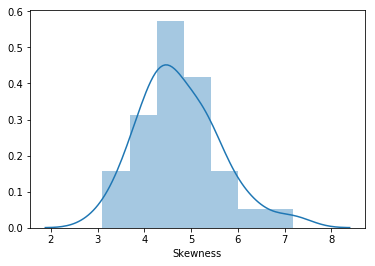

In [761]:
sns.distplot(master_df_all['skewness'])
plt.xlabel("Skewness")
plt.savefig('skewness.png')

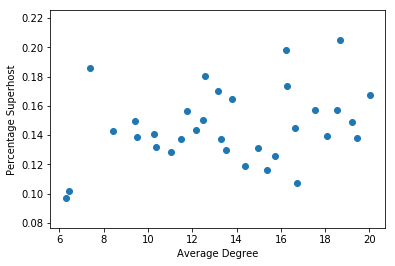

In [764]:
plt.scatter(master_df_all['average_reviews'],master_df_all['percentage_superhost'])
plt.xlabel("Average Degree")
plt.ylabel("Percentage Superhost")
plt.savefig('correlation.png')

In [676]:
print(pearsonr(master_df_all['average_reviews'], master_df_all['percentage_superhost']))

(array([0.29968655]), array([0.09019272]))


In [581]:
Y = master_df_all['average_reviews'].tolist()
X = master_df_all['percentage_superhost'].tolist()

In [582]:
X = sm.add_constant(X)

model = sm.OLS(Y,X)
results = model.fit()

In [583]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     3.059
Date:                Mon, 22 Apr 2019   Prob (F-statistic):             0.0902
Time:                        11:07:56   Log-Likelihood:                -89.476
No. Observations:                  33   AIC:                             183.0
Df Residuals:                      31   BIC:                             185.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0026      3.870      1.809      0.0

In [590]:
s = pd.Series(list(master_df_all.iloc[:,0]))
s = pd.get_dummies(s)

In [600]:
regression_sk = master_df_all.merge(s,left_index = True,right_index = True)

In [606]:
regression_sk.head()

,"(borough,)","(percentage_superhost,)","(average_reviews,)","(average_score,)","(skewness,)","(total_reviews,)","(total_listings,)",Barking and Dagenham,Barnet,Bexley,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,Barking and Dagenham,0.097222,6.295139,91.771605,5.162191,1813,174,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barnet,0.131935,10.357240,93.848233,6.308862,15308,1000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Bexley,0.102128,6.421277,91.207407,3.286608,1509,141,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Brent,0.126029,15.729437,92.363745,3.090692,36335,1713,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bromley,0.149758,9.421222,92.318735,5.283328,5860,422,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [611]:
X_sk = s.join(master_df_all.iloc[:,1])
Y_sk = master_df_all.iloc[:,2]

In [615]:
from sklearn.linear_model import LinearRegression

In [616]:
regression_model = LinearRegression()
regression_model.fit(X_sk, Y_sk)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [624]:
regression_model.coef_

array([-7.33330639, -3.30334587, -7.21171056,  2.07432056, -4.25586595,
        5.77950648,  1.71601962, -3.39970502,  2.59194502, -4.14927784,
       -0.52450596, -0.1273536 ,  3.85590664,  0.1192544 , -2.63251754,
       -6.33394222,  4.92783031,  4.86315523,  2.9513605 ,  1.31485891,
       -1.13078577,  6.32367545, -1.49291428, -5.25111308,  0.71355498,
       -2.1794839 ,  2.49454782,  5.55032474, -0.36223474,  3.0986148 ,
       -1.90409539, -1.19001526,  4.4072979 ,  0.92588548])

In [626]:
regression_model.score(X_sk, Y_sk)

1.0

In [ ]:
Y = master_df_all['average_reviews'].tolist()
X = master_df_all['percentage_superhost'].tolist()

In [627]:
X = sm.add_constant(X_sk)

model = sm.OLS(Y_sk,X_sk)
results = model.fit()

In [628]:
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     ('average_reviews',)   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                    nan
Method:                   Least Squares   F-statistic:                     0.000
Date:                  Mon, 22 Apr 2019   Prob (F-statistic):                nan
Time:                          11:29:13   Log-Likelihood:                 1039.4
No. Observations:                    33   AIC:                            -2013.
Df Residuals:                         0   BIC:                            -1963.
Df Model:                            32                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Ba

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1549: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1550: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1558: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


## Analysis - Reviewer Nodes

In [445]:
# Get borough for reviews

listing_borough = listings[['id', 'neighbourhood_cleansed']]

reviews_df = reviews.merge(listing_borough, right_on = 'id',left_on = 'listing_id')
reviews_df.head()

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,year,id_y,neighbourhood_cleansed
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...,2010,13913,Islington
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...,2011,13913,Islington
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...,2011,13913,Islington
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ...",2011,13913,Islington
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor...",2011,13913,Islington


In [450]:
# Summary statistics for the reviewer nodes
reviews_df.groupby('reviewer_id').count()['id_x']

count    1.036956e+06
mean     1.204936e+00
std      9.926001e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.380000e+02
Name: id_x, dtype: float64

In [672]:
# Summary statistics for the reviewer nodes
reviews_df.groupby('reviewer_id').count()['id_x'].skew()

23.79110769757798

In [454]:
# Count those reviewers with more than one review

reviewer_count = reviews_df.groupby('reviewer_id').count()
reviewer_count_greater_1 = reviewer_count[reviewer_count['id_x']>1]
print(len(reviewer_count_greater_1))

122275


In [455]:
# Total number of reviewers
print(len(reviewer_count))

1036956


In [461]:
# percentage of people who leave more than one review
print((len(reviewer_count_greater_1))/len(reviewer_count))

0.11791725010511536


In [462]:
reviewer_count.head()

,listing_id,id_x,date,reviewer_name,comments,year,id_y,neighbourhood_cleansed
reviewer_id,,,,,,,,
1,1,1,1,1,1,1,1,1
10,1,1,1,1,1,1,1,1
81,1,1,1,1,1,1,1,1
283,1,1,1,1,1,1,1,1
302,1,1,1,1,1,1,1,1


In [486]:
test = reviews_df[reviews_df['reviewer_id'].isin(list(reviewer_count_greater_1.index))]

In [487]:
test.head()

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,year,id_y,neighbourhood_cleansed
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...,2011,13913,Islington
9,13913,64559033,2016-03-05,45337884,Mo,"The House is a piece of Art , there are beauti...",2016,13913,Islington
11,13913,261305314,2018-05-06,106481379,Daniel,"Alina was an amazing host, simply brilliant. A...",2018,13913,Islington
13,13913,277816069,2018-06-17,31960932,Belinda,Lovely relaxed place to stay. Very friendly an...,2018,13913,Islington
16,15400,120941,2010-10-17,112795,Cédric,"I really enjoyed my week at Philippa's, the pl...",2010,15400,Kensington and Chelsea


In [ ]:
# generate degree distribution for reviewer nodes

review_stats_dic = {mean_reviews:mean(reviews_df.groupby('reviewer_id').count()[id_x])}

In [495]:
test[test['reviewer_id']==1647058]

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,year,id_y,neighbourhood_cleansed
27387,306405,937612,2012-02-21,1647058,Van,"very nice flat, very roomy & clean! nice host ...",2012,306405,Barking and Dagenham
27388,306405,959344,2012-02-28,1647058,Van,"very nice flat, very roomy & clean! nice host ...",2012,306405,Barking and Dagenham


In [498]:
# Calculate number of repeat visits
neighbourghood_number_visits = test.groupby(['neighbourhood_cleansed','reviewer_id']).nunique()
repeat_number = neighbourghood_number_visits[neighbourghood_number_visits['id_x']>1]

In [500]:
repeat_number.head()

listing_id  id_x  date  reviewer_id  \
neighbourhood_cleansed reviewer_id                                        
Barking and Dagenham   1647058               1     2     2            1   
                       1751940               1     2     2            1   
                       2434600               1     3     3            1   
                       10431518              3     3     3            1   
                       15036585              1     2     2            1   

                                    reviewer_name  comments  year  id_y  \
neighbourhood_cleansed reviewer_id                                        
Barking and Dagenham   1647058                  1         2     1     1   
                       1751940                  1         2     1     1   
                       2434600                  1         3     2     1   
                       10431518                 1         3     1     3   
                       15036585                 1         2     2     1   

                                    neighbourhood_cleansed  
neighbourhood_cleansed reviewer_id                          
Barking and Dagenham   1647058                           1  
                       1751940                           1  
                       2434600                           1  
                       10431518                          1  
                       15036585                          1

In [519]:
repeat_number_dic = {}
for borough in data.index:
    repeat_number_dic.update({borough:len(repeat_number.loc[borough])})
    

In [520]:
repeat_number_dic

{'Barking and Dagenham': 78,
 'Barnet': 975,
 'Bexley': 77,
 'Brent': 1689,
 'Bromley': 398,
 'Camden': 5202,
 'City of London': 174,
 'Croydon': 678,
 'Ealing': 1759,
 'Enfield': 338,
 'Greenwich': 1009,
 'Hackney': 4926,
 'Hammersmith and Fulham': 3645,
 'Haringey': 1588,
 'Harrow': 359,
 'Havering': 123,
 'Hillingdon': 662,
 'Hounslow': 1274,
 'Islington': 4134,
 'Kensington and Chelsea': 3840,
 'Kingston upon Thames': 433,
 'Lambeth': 3941,
 'Lewisham': 1299,
 'Merton': 701,
 'Newham': 1263,
 'Redbridge': 394,
 'Richmond upon Thames': 1442,
 'Southwark': 3429,
 'Sutton': 260,
 'Tower Hamlets': 6115,
 'Waltham Forest': 761,
 'Wandsworth': 2901,
 'Westminster': 6523}

In [539]:
# start creating reviewer stats dataframe

review_stats_df = pd.DataFrame.from_dict(repeat_number_dic,orient = 'index')
review_stats_df = review_stats_df.join(reviews_df.groupby('neighbourhood_cleansed').count()['id_x'])
review_stats_df.columns = [['number_repeat_visits','total_visits']]

In [540]:
review_stats_df

,number_repeat_visits,total_visits
Barking and Dagenham,78,1813
Barnet,975,15308
Bexley,77,1509
Brent,1689,36335
Bromley,398,5860
Camden,5202,107417
City of London,174,6498
Croydon,678,10567
Ealing,1759,25789
Enfield,338,5501


In [542]:
review_stats_df.to_csv('review_stats_df.csv')
review_stats_df = pd.read_csv('review_stats_df.csv')

In [543]:
review_stats_df['percentage_repeat_visits'] = review_stats_df['number_repeat_visits']/review_stats_df['total_visits']

In [544]:
review_stats_df

,Unnamed: 0,number_repeat_visits,total_visits,percentage_repeat_visits
0,Barking and Dagenham,78,1813,0.043023
1,Barnet,975,15308,0.063692
2,Bexley,77,1509,0.051027
3,Brent,1689,36335,0.046484
4,Bromley,398,5860,0.067918
5,Camden,5202,107417,0.048428
6,City of London,174,6498,0.026777
7,Croydon,678,10567,0.064162
8,Ealing,1759,25789,0.068207
9,Enfield,338,5501,0.061443


In [554]:
review_stats_df.sort_values('percentage_repeat_visits',ascending=False)

,Unnamed: 0,number_repeat_visits,total_visits,percentage_repeat_visits
28,Sutton,260,3286,0.079124
15,Havering,123,1586,0.077554
26,Richmond upon Thames,1442,18600,0.077527
14,Harrow,359,4895,0.073340
20,Kingston upon Thames,433,6124,0.070705
17,Hounslow,1274,18028,0.070668
8,Ealing,1759,25789,0.068207
4,Bromley,398,5860,0.067918
23,Merton,701,10861,0.064543
16,Hillingdon,662,10298,0.064284


In [769]:
review_stats_df.to_csv('review.csv')

In [767]:
review_stats_df['percentage_repeat_visits'].mean()

0.05645493594357034

In [709]:
# How many reviewers?
len(reviews.groupby('reviewer_id').count()['id'])

1036956

In [710]:
# average amount of reviews
reviews.groupby('reviewer_id').count()['id'].mean()

1.2049363714564552

In [711]:
# skewness
reviews.groupby('reviewer_id').count()['id'].skew()

23.79110769757798